In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

## Case Study #groupby()

In [189]:
# 시간과 데이터 종류가 정리된 통화량 데이터
df_phone = pd.read_csv('./data/phone_data.csv')
df_phone.dtypes

index             int64
date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

> 여기서 date는 object type이므로 string type임.
> 그래서 이걸 datetime type으로 바꿔주는 게 좋음.

In [ ]:
import dateutil

df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse, dayfirst = True)
df_phone.dtypes

* plot()으로 그래프 그리기 가능

<AxesSubplot:xlabel='month'>

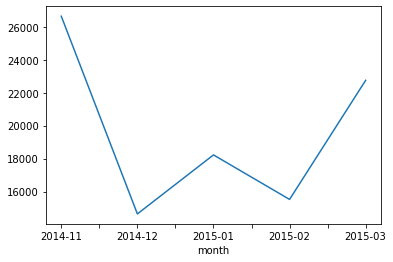

In [19]:
# 월별 통화량(duration)의 합
df_phone.groupby('month')['duration'].sum().plot()

In [31]:
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


* boolean으로 필터링해서 groupby 가능

<AxesSubplot:xlabel='month'>

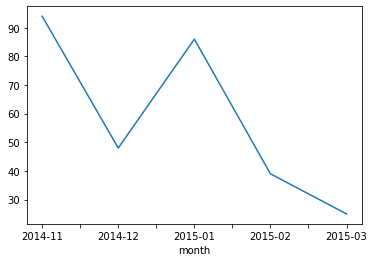

In [25]:
# item = 'sms' 인 것만의 월별 통화량
df_phone[df_phone['item']=='sms'].groupby('month')['duration'].sum().plot()

In [37]:
# 월별, item별로 통화량의 데이터 수를 matrix로 나타낸 것
df_phone.groupby(['month','item'])['duration'].count().unstack()

item,call,data,sms
month,,,
2014-11,107,29,94
2014-12,79,30,48
2015-01,88,31,86
2015-02,67,31,39
2015-03,47,29,25


<AxesSubplot:xlabel='month'>

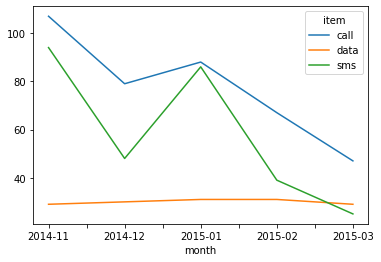

In [39]:
df_phone.groupby(['month','item'])['duration'].count().unstack().plot()

* aggregation 적용 가능 (dict type으로)

In [43]:
# 월별 통화량의 합
# as_index = False : groupby할 때 month를 index로 만들지 말라는 뜻
df_phone.groupby('month', as_index = False).agg({'duration' : 'sum'})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [47]:
# 그룹별 통화량은 min, max, sum을, 네트워크 타입은 갯수를, 날짜를 min, 첫날, 갯수를 출력
df_phone.groupby(['month', 'item']).agg({'duration' : [min, max, sum],
                                         'network_type' : 'count',
                                         'date' : [min, 'first', 'nunique']}).head()

duration                      network_type                date  \
                  min       max        sum        count                 min   
month   item                                                                  
2014-11 call    1.000  1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429    34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000     1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000  2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429    34.429   1032.870           30 2014-11-13 06:58:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30

* groupby된 DataFrame의 column 수정 및 변경 가능
  * rename()
  * add_prefix()
  * columns.droplevel()

In [49]:
grouped = df_phone.groupby('month').agg({'duration' : [min, max, np.mean]})
grouped

duration                     
             min      max        mean
month                                
2014-11      1.0   1940.0  115.823657
2014-12      1.0   2120.0   93.260318
2015-01      1.0   1859.0   88.894141
2015-02      1.0   1863.0  113.301453
2015-03      1.0  10528.0  225.251891

In [53]:
# column 이름 변경
grouped.rename(columns = {'min' : 'min_duration', 'max' : 'max_duration', 'mean' : 'mean_duration'})

duration                           
        min_duration max_duration mean_duration
month                                          
2014-11          1.0       1940.0    115.823657
2014-12          1.0       2120.0     93.260318
2015-01          1.0       1859.0     88.894141
2015-02          1.0       1863.0    113.301453
2015-03          1.0      10528.0    225.251891

In [65]:
# level 0 인 column ('duration') 삭제
grouped.columns = grouped.columns.droplevel(level=0)
grouped

,min,max,mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [67]:
# column들의 앞에 'duration_' 추가
grouped.add_prefix('duration_')

,duration_min,duration_max,duration_mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


## Pivot Table

* Index 축은 groupby와 동일함 (unstack()을 이용하는 것과 같음)
* column에 추가로 labeling을 추가하여 value에 numeric type 값을 aggregation하는 형태

In [ ]:
df_phone

In [70]:
df_phone.pivot_table(
    values = ['duration'], # 값
    index = [df_phone.month, df_phone.item], 
    columns = df_phone.network,
    aggfunc = 'sum', # '' 안에 꼭 적어줘야 함
    fill_value = 0 # Nan값을 대체할 값
)

duration                                                   \
network        Meteor Tesco  Three Vodafone      data landline special   
month   item                                                             
2014-11 call     1521  4045  12458     4316     0.000     2906       0   
        data        0     0      0        0   998.441        0       0   
        sms        10     3     25       55     0.000        0       1   
2014-12 call     2010  1819   6316     1302     0.000     1424       0   
        data        0     0      0        0  1032.870        0       0   
        sms        12     1     13       18     0.000        0       0   
2015-01 call     2207  2904   6445     3626     0.000     1603       0   
        data        0     0      0        0  1067.299        0       0   
        sms        10     3     33       40     0.000        0       0   
2015-02 call     1188  4087   6279     1864     0.000      730       0   
        data        0     0      0        0  1067.299        0       0   
        sms         1     2     11       23     0.000        0       2   
2015-03 call      274   973   4966     3513     0.000    11770       0   
        data        0     0      0        0   998.441        0       0   
        sms         0     4      5       13     0.000        0       0   

                              
network      voicemail world  
month   item                  
2014-11 call       301     0  
        data         0     0  
        sms          0     0  
2014-12 call       690     0  
        data         0     0  
        sms          0     4  
2015-01 call       285     0  
        data         0     0  
        sms          0     0  
2015-02 call       268     0  
        data         0     0  
        sms          0     0  
2015-03 call       231     0  
        data         0     0  
        sms          0     3

* groupby와 unstack()으로 똑같이 만들 수 있음

In [75]:
df_phone.groupby(['month','item','network'])['duration'].sum().unstack(fill_value=0)

network       Meteor   Tesco    Three  Vodafone      data  landline  special  \
month   item                                                                   
2014-11 call  1521.0  4045.0  12458.0    4316.0     0.000    2906.0      0.0   
        data     0.0     0.0      0.0       0.0   998.441       0.0      0.0   
        sms     10.0     3.0     25.0      55.0     0.000       0.0      1.0   
2014-12 call  2010.0  1819.0   6316.0    1302.0     0.000    1424.0      0.0   
        data     0.0     0.0      0.0       0.0  1032.870       0.0      0.0   
        sms     12.0     1.0     13.0      18.0     0.000       0.0      0.0   
2015-01 call  2207.0  2904.0   6445.0    3626.0     0.000    1603.0      0.0   
        data     0.0     0.0      0.0       0.0  1067.299       0.0      0.0   
        sms     10.0     3.0     33.0      40.0     0.000       0.0      0.0   
2015-02 call  1188.0  4087.0   6279.0    1864.0     0.000     730.0      0.0   
        data     0.0     0.0      0.0       0.0  1067.299       0.0      0.0   
        sms      1.0     2.0     11.0      23.0     0.000       0.0      2.0   
2015-03 call   274.0   973.0   4966.0    3513.0     0.000   11770.0      0.0   
        data     0.0     0.0      0.0       0.0   998.441       0.0      0.0   
        sms      0.0     4.0      5.0      13.0     0.000       0.0      0.0   

network       voicemail  world  
month   item                    
2014-11 call      301.0    0.0  
        data        0.0    0.0  
        sms         0.0    0.0  
2014-12 call      690.0    0.0  
        data        0.0    0.0  
        sms         0.0    4.0  
2015-01 call      285.0    0.0  
        data        0.0    0.0  
        sms         0.0    0.0  
2015-02 call      268.0    0.0  
        data        0.0    0.0  
        sms         0.0    0.0  
2015-03 call      231.0    0.0  
        data        0.0    0.0  
        sms         0.0    3.0

## Crosstab

* 특허 두 칼럼에 교차 빈도, 비율, 덧셈 등을 구할 때 사용
* Pivot table의 특수한 형태
* User-Item Rating Matrix 등을 만들 때 사용 가능

In [77]:
df_movie = pd.read_csv('https://raw.githubusercontent.com/TeamLab/machine_learning_from_scratch_with_python/master/code/ch5/data/movie_rating.csv')
df_movie.head()

,critic,title,rating
0,Jack Matthews,Lady in the Water,3.0
1,Jack Matthews,Snakes on a Plane,4.0
2,Jack Matthews,You Me and Dupree,3.5
3,Jack Matthews,Superman Returns,5.0
4,Jack Matthews,The Night Listener,3.0


* 아래의 결과들은 모두 동일하기 때문에 편한 대로 하면 됨

In [79]:
pd.crosstab(
    index = df_movie.critic,
    columns = df_movie.title,
    values = df_movie.rating,
    aggfunc = 'first'
).fillna(0)

title,Just My Luck,Lady in the Water,Snakes on a Plane,Superman Returns,The Night Listener,You Me and Dupree
critic,,,,,,
Claudia Puig,3.0,0.0,3.5,4.0,4.5,2.5
Gene Seymour,1.5,3.0,3.5,5.0,3.0,3.5
Jack Matthews,0.0,3.0,4.0,5.0,3.0,3.5
Lisa Rose,3.0,2.5,3.5,3.5,3.0,2.5
Mick LaSalle,2.0,3.0,4.0,3.0,3.0,2.0
Toby,0.0,0.0,4.5,4.0,0.0,1.0


In [82]:
df_movie.pivot_table(
    values = ['rating'],
    index = df_movie.critic,
    columns = df_movie.title,
    aggfunc = 'first'
).fillna(0)

rating                                      \
title         Just My Luck Lady in the Water Snakes on a Plane   
critic                                                           
Claudia Puig           3.0               0.0               3.5   
Gene Seymour           1.5               3.0               3.5   
Jack Matthews          0.0               3.0               4.0   
Lisa Rose              3.0               2.5               3.5   
Mick LaSalle           2.0               3.0               4.0   
Toby                   0.0               0.0               4.5   

                                                                     
title         Superman Returns The Night Listener You Me and Dupree  
critic                                                               
Claudia Puig               4.0                4.5               2.5  
Gene Seymour               5.0                3.0               3.5  
Jack Matthews              5.0                3.0               3.5  
Lisa Rose                  3.5                3.0               2.5  
Mick LaSalle               3.0                3.0               2.0  
Toby                       4.0                0.0               1.0

In [84]:
df_movie.groupby(['critic','title']).agg({'rating':'first'}).unstack()

rating                                      \
title         Just My Luck Lady in the Water Snakes on a Plane   
critic                                                           
Claudia Puig           3.0               NaN               3.5   
Gene Seymour           1.5               3.0               3.5   
Jack Matthews          NaN               3.0               4.0   
Lisa Rose              3.0               2.5               3.5   
Mick LaSalle           2.0               3.0               4.0   
Toby                   NaN               NaN               4.5   

                                                                     
title         Superman Returns The Night Listener You Me and Dupree  
critic                                                               
Claudia Puig               4.0                4.5               2.5  
Gene Seymour               5.0                3.0               3.5  
Jack Matthews              5.0                3.0               3.5  
Lisa Rose                  3.5                3.0               2.5  
Mick LaSalle               3.0                3.0               2.0  
Toby                       4.0                NaN               1.0

## Merge

* SQL에서 많이 사용하는 Merge와 같은 기능
* 두 개의 데이터를 하나로 합침

In [86]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_score': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'test_score'])
df_a

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [87]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


* `on='column_name'` : merge하는 두 df의 기준 column (겹치는 데이터만 합침)

In [89]:
pd.merge(df_a, df_b, on='subject_id')

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


* `left_on`, `right_on` : 왼쪽 df와 오른쪽 df의 column이 다를 때 기준이 되는 column

In [91]:
pd.merge(df_a, df_b, left_on = "subject_id", right_on = "subject_id")

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


* left join : 왼쪽 df를 기준으로 병합, 없는 값들은 NaN으로 채워짐

In [95]:
pd.merge(df_a, df_b, on = 'subject_id', how = 'left')

,subject_id,test_score,first_name,last_name
0,1,51,NaN,NaN
1,2,15,NaN,NaN
2,3,15,NaN,NaN
3,4,61,Billy,Bonder
4,5,16,Brian,Black
5,7,14,Bryce,Brice
6,8,15,Betty,Btisan
7,9,1,NaN,NaN
8,10,61,NaN,NaN
9,11,16,NaN,NaN


* right join : 오른쪽 df를 기준으로 병합, 없는 값들은 NaN으로 채워짐

In [98]:
pd.merge(df_a, df_b, on = 'subject_id', how = 'right')

,subject_id,test_score,first_name,last_name
0,4,61.0,Billy,Bonder
1,5,16.0,Brian,Black
2,6,NaN,Bran,Balwner
3,7,14.0,Bryce,Brice
4,8,15.0,Betty,Btisan


* `how='inner'` : 기본값이 inner join임 (겹치는 값들만 조인)

* full(outer) join : 양쪽 다 병합

In [100]:
pd.merge(df_a, df_b, on = 'subject_id', how = 'outer')

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,Billy,Bonder
4,5,16.0,Brian,Black
5,7,14.0,Bryce,Brice
6,8,15.0,Betty,Btisan
7,9,1.0,NaN,NaN
8,10,61.0,NaN,NaN
9,11,16.0,NaN,NaN


* index base join : index값을 기준으로 조인
  * 이름이 같은 column들은 _x, _y 의 형식으로 이름 뒤에 붙음

In [104]:
pd.merge(df_a, df_b, right_index = True, left_index = True)

,subject_id_x,test_score,subject_id_y,first_name,last_name
0,1,51,4,Billy,Bonder
1,2,15,5,Brian,Black
2,3,15,6,Bran,Balwner
3,4,61,7,Bryce,Brice
4,5,16,8,Betty,Btisan


## Concat

* 같은 형태의 데이터를 붙이는 연산 작업
* 밑으로, 옆으로 둘 다 붙일 수 있음
* 같은 column을 가지고 있을 때 많이 사용
* `pd.concat([df_a, df_b])` : list의 형식으로 df를 담아 concat함.

In [106]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [107]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [120]:
df_new = pd.concat([df_a, df_b])
df_new.reset_index(drop=True)

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,4,Billy,Bonder
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Btisan


In [115]:
# concat과 같은 효과
df_a.append(df_b)

C:\Users\서용득\AppData\Local\Temp\ipykernel_6756\2525587740.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_a.append(df_b)


,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


* `axis = 1` : 옆으로 붙이기 가능

In [118]:
df_new = pd.concat([df_a, df_b], axis = 1)
df_new.reset_index(drop=True)

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


## Case study

#### 월별로 생성된 엑셀 파일같은 것들에서 concat, merge, groupby를 이용해 정보를 얻을 수 있다.

In [122]:
import os

In [165]:
# file들의 이름을 불러옴
files = [file_name for file_name in os.listdir("./data") if file_name.endswith('xlsx')]
files

['customer-status.xlsx',
 'excel-comp-data.xlsx',
 'sales-feb-2014.xlsx',
 'sales-jan-2014.xlsx',
 'sales-mar-2014.xlsx']

In [166]:
files.remove('excel-comp-data.xlsx')
files

['customer-status.xlsx',
 'sales-feb-2014.xlsx',
 'sales-jan-2014.xlsx',
 'sales-mar-2014.xlsx']

In [ ]:
# 파일들의 이름은 상위 폴더와 합쳐주고 엑셀 파일을 불러와서 리스트에 저장
df_list = [pd.read_excel(os.path.join("./data", df_filename)) for df_filename in files]
df_list

In [168]:
# 첫 번째 df는 고객의 정보를 담고 있어 status에 따로 할당하고 나머지 3개는 concat
status = df_list[0]
sales = pd.concat(df_list[1:])

In [169]:
status

,account number,name,status
0,740150,Barton LLC,gold
1,714466,Trantow-Barrows,silver
2,218895,Kulas Inc,bronze
3,307599,"Kassulke, Ondricka and Metz",bronze
4,412290,Jerde-Hilpert,bronze
5,729833,Koepp Ltd,silver
6,146832,Kiehn-Spinka,silver
7,688981,Keeling LLC,silver
8,786968,"Frami, Hills and Schmidt",silver
9,239344,Stokes LLC,gold


In [170]:
sales.head()

,account number,name,sku,quantity,unit price,ext price,date
0,383080,Will LLC,B1-20000,7,33.69,235.83,2014-02-01 09:04:59
1,412290,Jerde-Hilpert,S1-27722,11,21.12,232.32,2014-02-01 11:51:46
2,412290,Jerde-Hilpert,B1-86481,3,35.99,107.97,2014-02-01 17:24:32
3,412290,Jerde-Hilpert,B1-20000,23,78.90,1814.70,2014-02-01 19:56:48
4,672390,Kuhn-Gusikowski,S1-06532,48,55.82,2679.36,2014-02-02 03:45:20


* status에 sales를 왼쪽 merge ('account number'를 기준으로)

In [171]:
merge_df = pd.merge(status, sales, how='left', on = 'account number')
merge_df.head()

,account number,name_x,status,name_y,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,gold,Barton LLC,S1-93683,21,10.34,217.14,2014-02-07 08:34:50
1,740150,Barton LLC,gold,Barton LLC,S2-10342,47,96.68,4543.96,2014-02-12 03:36:52
2,740150,Barton LLC,gold,Barton LLC,B1-38851,3,79.49,238.47,2014-02-12 05:09:16
3,740150,Barton LLC,gold,Barton LLC,B1-20000,28,81.39,2278.92,2014-02-15 07:45:16
4,740150,Barton LLC,gold,Barton LLC,B1-38851,17,81.22,1380.74,2014-02-17 17:12:16


In [172]:
# 겹치는 name_x, name_y 중 하나를 삭제
del merge_df['name_x']

In [173]:
# status와 name_y를 기준으로 quantity와 ext price의 합을 그룹화하고, status와 quantity를 기준으로 내림차순 정렬
merge_df.groupby(['status', 'name_y'])['quantity','ext price'].sum().reset_index().sort_values(by=['status', 'quantity'],ascending = False)

C:\Users\서용득\AppData\Local\Temp\ipykernel_6756\2224036624.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merge_df.groupby(['status', 'name_y'])['quantity','ext price'].sum().reset_index().sort_values(by=['status', 'quantity'],ascending = False)


,status,name_y,quantity,ext price
14,silver,Trantow-Barrows,643,35354.61
13,silver,Kuhn-Gusikowski,558,29994.43
15,silver,White-Trantow,556,34070.80
10,silver,Keeling LLC,438,27341.41
11,silver,Kiehn-Spinka,350,21027.06
9,silver,"Frami, Hills and Schmidt",338,19634.31
12,silver,Koepp Ltd,315,17381.89
6,gold,"Cronin, Oberbrunner and Spencer",543,26809.63
8,gold,Stokes LLC,449,25680.43
7,gold,Herman LLC,417,22940.82


## Load database

* 이런 방식으로 데이터를 바로 불러올 수 있다는 정도만 알면 됨.

In [ ]:
import sqlite3

conn = sqlite3.connect("./data/flights.db")
cur = conn.cursor()
cur.execute("select * from airlines limit 5;")
results = cur.fetchall()
results # tuple 형태로 들어옴

### Data loading using pandas from DB

In [ ]:
df_airlines = pd.read_sql_query('select * from airlines;', conn)
df_airlines.reset_index(drop=True)

In [181]:
df_airports = pd.read_sql_query('select * from airports;', conn)
df_routes = pd.read_sql_query('select * from routes;', conn)

### Pandas persistence

**install**
* conda install openpyxl
* conda install XlsxWriter

* excel로 저장 가능

In [182]:
writer = pd.ExcelWriter("./data/df_route.xlsx", engine = 'xlsxwriter')
df_routes.to_excel(writer, sheet_name = 'Sheet1')

* pickle로 저장 가능

In [184]:
df_routes.to_pickle('./data/df_routes.pickle')

In [186]:
df_routes_pickle = pd.read_pickle('./data/df_routes.pickle')
df_routes_pickle.head()

,index,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,0,2B,410,AER,2965,KZN,2990,None,0,CR2
1,1,2B,410,ASF,2966,KZN,2990,None,0,CR2
2,2,2B,410,ASF,2966,MRV,2962,None,0,CR2
3,3,2B,410,CEK,2968,KZN,2990,None,0,CR2
4,4,2B,410,CEK,2968,OVB,4078,None,0,CR2
